<a href="https://colab.research.google.com/github/albert-zariqi/PrewittEdgeDetector/blob/master/Prewitt_Edge_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
path = '/content/drive/MyDrive/1_prewitt (1)/julia.tif'

In [ ]:
def gradient_filter(img, prewitt_mat):
  result = np.zeros( img.shape )
  for y in range( 0, img.shape[ 0 ] - 2 ) :
      for x in range( 0, img.shape[ 1 ] - 2 ) :
          result[ y ] [ x ] = np.sum( prewitt_mat * img [ y : y + 3, x : x + 3 ] )
  return result
  

In [ ]:
def non_maxima_suppression( img , angle ) :
  nms = np.zeros ( img.shape )
  for y in range ( 1 , img.shape [ 0 ] - 1 ) :
      for x in range ( 1 , img.shape [ 1 ] - 1 ) :
          if (angle [ y , x ] >= 0 and angle [ y , x ] < 22.5) :
              magn = max ( img [ y , x - 1 ] , img [ y , x + 1 ] )
          elif (angle [ y , x ] >= 22.5 and angle [y , x] < 67.5) :
              magn = max ( img [ y - 1 , x - 1 ] , img [ y + 1 , x + 1 ] )
          elif (angle [ y , x ] >= 67.5 and angle [ y , x ] < 112.5) :
              magn = max ( img [ y - 1 , x ] , img [ y + 1 , x ] )
          elif (angle [ y , x ] >= 112.5 and angle [ y , x ] < 157.5) :
              magn = max ( img [ y - 1 , x + 1 ] , img [ y + 1 , x - 1 ] )
          else :
              magn = max ( img [ y , x - 1 ] , img [ y , x + 1 ] )

          if img [ y , x ] < magn :
              nms [ y , x ] = 0
          else :
              nms [ y , x ] = img [ y , x ]
  return nms

In [ ]:
def prewitt_edge_detector_assignment_1(path):
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img_gaussian = cv2.GaussianBlur(img,(3,3),0)

  kernelX = np.array([[-1,0,1], [-1,0,1], [-1, 0, 1]])
  kernelY = np.array([[-1,-1,-1], [0,0,0], [1, 1, 1]])

  cv2_imshow(img)
  cv2.waitKey( 0 )

  prewittX = gradient_filter(img, kernelX)
  prewittY = gradient_filter(img, kernelY)

  result = np.sqrt( prewittX ** 2 + prewittY ** 2 )
  result = (result / np.max ( result )) * 255

  cv2_imshow(result)
  cv2.waitKey(0)

  grad = np.rad2deg(np.arctan2(prewittY, prewittX)) 
  grad[ grad < 0 ] += 180
  nms = non_maxima_suppression(result, grad)
  
  cv2_imshow(nms)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

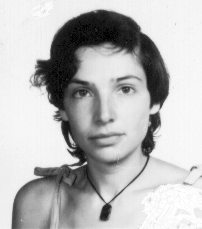

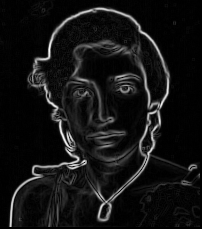

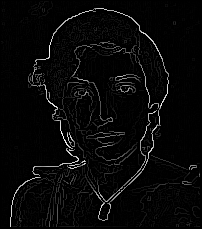

In [ ]:
prewitt_edge_detector_assignment_1(path)